<a href="https://colab.research.google.com/github/sangho24/sogang/blob/main/EC5320_2024_2_Week9a_messy_tabular_data_v2_for_students_20200572.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EC5320 Week9a codes: Working with messy tabular data

2024.10.29.<br>

Author: Hyunjoo Yang (hyang@sogang.ac.kr)<br><br>

This notebook uses Fastai and XGBoost to do classificaiton with messy tabular data.<br><br>

Data source:<br>
https://docs.fast.ai/tutorial.tabular.html <br>
http://archive.ics.uci.edu/ml/datasets/Adult



# 기말고사 project
코랩 파일, 워드 파일

1. 문제의식
2. 뭘 할 거
3. 사용하는 머신러닝 모델
4. 데이터 전처리
5. 결과
6. 의미와 결론
7.

재미있는 아이디어, 어떤 데이터를 모았는지, motivation은 뭐였는지 -> 기술 측면과 아이디어!

- 중간고사 내용  
## part1)
1.4 augmentation 과적합을 막기 위해 쓸 수 있다 or 방향을 고려해야 하는 데이터의 경우 augmentation을 진행하면 안 된다.
1.5 epoch는 시간 제약에 따라 자유롭게 설정할 수 있음. But patience를 늘릴수록 global maximum 에 도달할 확률이 높음, 돌리기 전에는 알 수 없음.
1.8 accuracy 정도에 따라 결정하면 되는데, domain마다 다름. 도박같은 경우 50.1만 넘어도 쓸만한 모델일 것.
1.11 validation set의 accuracy가 떨어지는 부분이 있다면 overfitting sign

## part2)
주어진 data에 rotation이 많으면 XGBoost 모델 쓰기 어려움
2.9 CNN, XGBoost 모두 사용, class별 확률을 평균을 낸다...?



# 1. Prepare data

In [1]:
import fastai
print(fastai.__version__)

#from fastai.vision.all import *
#from fastai.text.all import *
#from fastai.collab import *
from fastai.tabular.all import *

from matplotlib.pyplot import imshow

2.7.18


In [2]:
""" upload adult.csv """

' upload adult.csv '

In [3]:
df = pd.read_csv('adult.csv', low_memory=False)
df.sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
7804,51,Private,48343,Masters,14.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,7298,0,50,United-States,>=50k
17178,44,Private,188331,Some-college,10.0,Separated,Tech-support,Not-in-family,White,Female,0,0,38,United-States,<50k
9054,52,Private,173987,10th,6.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<50k
6070,34,Self-emp-not-inc,31740,HS-grad,9.0,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<50k
15867,25,Private,110138,HS-grad,9.0,Never-married,Other-service,Not-in-family,White,Male,0,0,40,United-States,<50k
8221,38,Private,396595,Some-college,10.0,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k
5981,23,Private,210053,Some-college,10.0,Never-married,Other-service,Not-in-family,White,Female,0,0,28,United-States,<50k
825,39,Private,51100,HS-grad,9.0,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,>=50k
30366,18,?,437851,Some-college,10.0,Never-married,?,Own-child,White,Male,0,0,40,United-States,<50k
8853,41,Private,49797,Some-college,10.0,Separated,Exec-managerial,Not-in-family,Black,Female,0,0,40,United-States,<50k


In [4]:
df.shape

(32561, 15)

In [5]:
# check missing values

print(df.isnull().sum())

age                 0
workclass           0
fnlwgt              0
education           0
education-num     487
marital-status      0
occupation        512
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country      0
salary              0
dtype: int64


# 2. Classification with tabular data (FASTAI version)

In [6]:
# prepare fastai tabular data

# 변수형 지정만 해주면 됨
to = TabularPandas(df, procs=[Categorify, FillMissing, Normalize],  #Categorify -> labelencoding   # FillMissing -> fillna # Normalize -> standardscaling
                   cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race'],
                   cont_names = ['age', 'education-num'],
                   y_names='salary',
                   y_block = CategoryBlock,
                   splits=RandomSplitter(valid_pct=0.2)(range_of(df))
                   )

/usr/local/lib/python3.10/dist-packages/fastai/tabular/core.py:314: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  to[n].fillna(self.na_dict[n], inplace=True)


In [7]:
len(to.train), len(to.valid)

(26049, 6512)

In [8]:
to.show(3)

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,education-num,salary
4621,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,False,47.0,13.0,>=50k
22966,Self-emp-inc,12th,Married-civ-spouse,Exec-managerial,Husband,White,False,67.0,8.0,<50k
14349,Private,Assoc-voc,Divorced,Adm-clerical,Unmarried,Black,False,45.0,11.0,<50k


In [9]:
to.items.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,education-num_na
4621,0.613559,5,33710,10,1.147071,3,5,1,5,Male,3103,0,60,United-States,1,1
22966,2.078884,6,116986,3,-0.817327,3,5,1,5,Male,0,0,20,United-States,0,1
14349,0.467026,5,170600,9,0.361312,1,2,5,3,Female,0,0,40,United-States,0,1


In [10]:
to.classes

{'workclass': ['#na#', ' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private', ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
 'education': ['#na#', ' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate', ' HS-grad', ' Masters', ' Preschool', ' Prof-school', ' Some-college'],
 'marital-status': ['#na#', ' Divorced', ' Married-AF-spouse', ' Married-civ-spouse', ' Married-spouse-absent', ' Never-married', ' Separated', ' Widowed'],
 'occupation': ['#na#', ' ?', ' Adm-clerical', ' Armed-Forces', ' Craft-repair', ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners', ' Machine-op-inspct', ' Other-service', ' Priv-house-serv', ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support', ' Transport-moving'],
 'relationship': ['#na#', ' Husband', ' Not-in-family', ' Other-relative', ' Own-child', ' Unmarried', ' Wife'],
 'race': ['#na#', ' Amer-Indian-Eskimo', ' Asian-Pac-Island

In [11]:
# check X variables (xs)
to.xs.head()

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,education-num
4621,5,10,3,5,1,5,1,0.613559,1.147071
22966,6,3,3,5,1,5,1,2.078884,-0.817327
14349,5,9,1,2,5,3,1,0.467026,0.361312
12170,5,12,3,4,1,5,1,-0.265636,-0.424447
19643,5,12,3,2,1,5,1,-0.778500,-0.424447


In [12]:
# check y variables (xs)
to.ys.head()

,salary
4621,1
22966,0
14349,0
12170,0
19643,0


In [13]:
# load tabular data to dataloader
dls = to.dataloaders(bs=64)

In [14]:
# begin training

beta = 2
what_to_monitor = 'fbeta_score' # precision_score, recall_score, fbeta_score

learn = tabular_learner(dls,
                        metrics=[accuracy, Precision(), Recall(), FBeta(beta)]).to_fp16()

# tabular_learner option: layers[500,250]

learn.path = Path('./')

learn.fit_one_cycle(20, cbs=[EarlyStoppingCallback(monitor=what_to_monitor, patience=5),
                                       SaveModelCallback(monitor=what_to_monitor)])

/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,fbeta_score,time
0,0.543588,0.538446,0.776413,0.515697,0.804703,0.723599,00:06
1,0.391618,0.378735,0.835688,0.654181,0.638798,0.641817,00:06
2,0.367104,0.352748,0.833845,0.645120,0.651862,0.650502,00:05
3,0.369765,0.347676,0.838606,0.687207,0.575441,0.594788,00:06
4,0.359399,0.352228,0.839527,0.680000,0.599608,0.614129,00:05
5,0.357334,0.351642,0.839066,0.671886,0.616590,0.626909,00:07


Better model found at epoch 0 with fbeta_score value: 0.723599201221661.
No improvement since epoch 0: early stopping


/usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

In [15]:
#learn.show_results()

/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


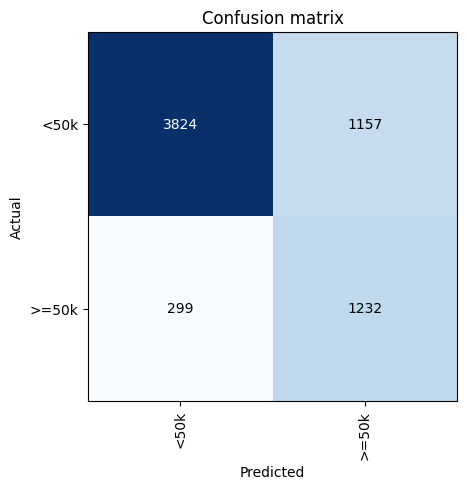

In [16]:
# confusion matrix

fastai_interp = ClassificationInterpretation.from_learner(learn)
fastai_interp.plot_confusion_matrix()

/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


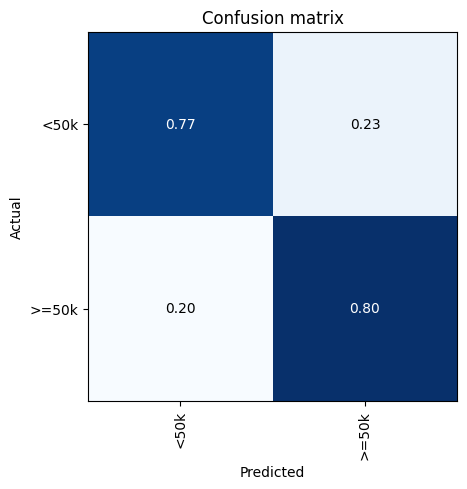

In [17]:
# confusion matrix (normalized)

fastai_interp.plot_confusion_matrix(normalize=True)

In [18]:
# predict using an observation
df.iloc[0]

,0
age,49
workclass,Private
fnlwgt,101320
education,Assoc-acdm
education-num,12.0
marital-status,Married-civ-spouse
occupation,NaN
relationship,Wife
race,White
sex,Female


In [19]:
row, clas, probs = learn.predict(df.iloc[0])

/usr/local/lib/python3.10/dist-packages/fastai/tabular/core.py:314: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  to[n].fillna(self.na_dict[n], inplace=True)
/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: 

In [20]:
row.show()

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,education-num,salary
0,Private,Assoc-acdm,Married-civ-spouse,#na#,Wife,White,False,49.0,12.0,>=50k


In [21]:
clas, probs

(tensor(1), tensor([0.2404, 0.7596]))

In [ ]:
# predict using the whole df

test_df = df.copy()
test_df.drop(['salary'], axis=1, inplace=True)
dl = learn.dls.test_dl(test_df)

In [ ]:
# get predictions

learn.get_preds(dl=dl)

In [ ]:
# export preprocessed dfs

X_train_fastai, y_train_fastai = to.train.xs, to.train.ys.values.ravel()
X_valid_fastai, y_valid_fastai = to.valid.xs, to.valid.ys.values.ravel()

In [ ]:
X_train_fastai

# 3. Classificaiton with XGBoost

## 3.1 install and import xgboost

In [ ]:
import xgboost as xgb
from xgboost import cv

In [ ]:
# set XGBoost regressor parameters

my_random_seed = 128

# use early stopping
early_stop_rounds = 10

xgb_classify_test = xgb.XGBClassifier(random_state=my_random_seed,
                                 early_stopping_rounds=early_stop_rounds)

In [ ]:
%%time

## train

xgb_classify_test.fit(X_train_fastai, y_train_fastai,
            eval_set=[(X_valid_fastai, y_valid_fastai)])

## 3.2 Prepare train, valid, test dataset

In [ ]:
# shuffle data set
my_seed = 42

from sklearn.utils import shuffle
df_shuffled = shuffle(df, random_state=my_seed)
df_shuffled

In [ ]:
# set XX percent out of total sample (0.1, 0.3, 0.5, etc)
# (np.fix: nearest integer towards zero)

df_num_obs = df_shuffled.shape[0]

"""
num_train_samples = int(np.fix(df_num_obs * 0.6))
num_val_samples = int(np.fix(df_num_obs * 0.2))
num_test_samples = int(np.fix(df_num_obs * 0.2))
"""

# or set number

num_train_samples = 20000
num_val_samples = 3000
num_test_samples = 3000

print(num_train_samples, num_val_samples, num_test_samples)


num_total_samples = num_train_samples + num_val_samples + num_test_samples
num_train_val_samples = num_train_samples + num_val_samples


In [ ]:
# split df into train, validation and test sets

df_train = df_shuffled[0:num_train_samples]

df_valid = df_shuffled[num_train_samples:num_train_samples + num_val_samples]

df_test = df_shuffled[num_train_samples + num_val_samples: num_total_samples]
#df_test = df_shuffled[-num_test_samples:]

print(df_train.shape[0], df_valid.shape[0], df_test.shape[0])

In [ ]:
# prepare ground truth data by convert '<50k' '>=50k' to 0 and 1

print(df['salary'].value_counts())

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y = le.fit_transform(df['salary'])

print('')
print('classes: {}'.format(le.classes_))
print('')

y

In [ ]:
df['salary']

In [ ]:
# split y into train, valid, test set

y_train = y[0:num_train_samples]

y_valid = y[num_train_samples:num_train_samples + num_val_samples]

y_test = y[num_train_samples + num_val_samples: num_total_samples]
#y_test = y[-num_test_samples:]

print(y_train.shape[0], df_valid.shape[0], df_test.shape[0])

y_train

## 3.3 preprocess variables

In [ ]:
df_train.head()

In [ ]:
print(df.isnull().sum())

How to deal with missing values? <br>


1.   Drop missing observations (df.dropna(subset=["education-num"]))
2.   Replace missing values with some stat (e.g., median or mean) using simple imputer



In [ ]:
numerical_vars = ['age', 'education-num']
categorical_vars = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race']

In [ ]:
# get the list of columns with missing values

cols_with_missing = [col for col in df_train.columns
                                 if df_train[col].isnull().any()]
cols_with_missing

In [ ]:
# data preprocessing pipeline

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

numeric_vars = ['age', 'education-num']
categorical_vars = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race']

numeric_pipeline = Pipeline([
                             ('num imputer', SimpleImputer(strategy="median", add_indicator=True)),
                             ('std_scalder', StandardScaler())
                             ])

cat_pipeline = Pipeline([
                         ('cat imputer', SimpleImputer(strategy='constant', fill_value='Missing')),
                         ('cat 1hot', OneHotEncoder(sparse_output=False, dtype=int))
])
# alternative: OrdinalEncoder

full_pipeline = ColumnTransformer([
                                   ("num", numeric_pipeline, numeric_vars),
                                   ("cat", cat_pipeline, categorical_vars)
                                   ])

In [ ]:
df_train_prepared = pd.DataFrame(full_pipeline.fit_transform(df_train))
df_train_prepared

In [ ]:
df_valid_prepared = pd.DataFrame(full_pipeline.transform(df_valid))
df_valid_prepared

## 3.4 train using xgboost

In [ ]:
# set XGBoost regressor parameters

my_seed = 42

early_stop_rounds = 20


""" FOR REGRESSION
params = {'objective':'reg:squarederror', 'eval_metric':'rmse',
          'random_state':my_seed, 'nthread':-1, 'n_estimators':300
        }
xgb_reg = xgb.XGBRegressor(**params)
"""
# if gpu is used, add 'device':'cuda' below

params = {'objective':'binary:logistic', 'eval_metric':'error',
          'random_state':my_seed, 'nthread':-1, 'n_estimators':300,
          'early_stopping_rounds':early_stop_rounds
          }

# for multiclass classification: 'objective':'reg:squarederror' ('eval_metric':'merror')
# check: https://xgboost.readthedocs.io/en/stable/parameter.html

xgb_classify = xgb.XGBClassifier(**params)

#print(xgb_reg)

In [ ]:
%%time

# train

xgb_classify.fit(df_train_prepared, y_train,
            eval_set=[(df_valid_prepared, y_valid)], )

In [ ]:
# get validation set prediction results

y_pred_xgb = xgb_classify.predict(df_valid_prepared)
y_pred_xgb

In [ ]:
# get validation set prediction results

y_pred_proba_xgb = xgb_classify.predict_proba(df_valid_prepared)
y_pred_proba_xgb

In [ ]:
# confusion matrix plot

import itertools

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix
    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']
    title:        the text to display at the top of the matrix
    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues
    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    plt.figure(figsize=(12, 9))

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.3f}; misclass={:0.3f}'.format(accuracy, misclass))
    plt.show()

In [ ]:
# confusion matrics

from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y_valid, y_pred_xgb)

In [ ]:
# plot confusion matrix (raw)

my_classes = [0,1]

plot_confusion_matrix(conf_mx, my_classes, cmap=None, normalize=False)

In [ ]:
plot_confusion_matrix(conf_mx, my_classes, cmap='Reds', normalize=True)

In [ ]:
# set scale pos weight for imbalanced classification problems
# scale_pos_weight = total_negative_examples / total_positive_examples

unique, counts = np.unique(y_train, return_counts=True)
print(np.asarray((unique, counts)).T)

my_scale_pos_weight = 15184 / 4816
my_scale_pos_weight

In [ ]:
params2 = {'objective':'binary:logistic', 'eval_metric':'error',
           'random_state':my_seed, 'nthread':-1, 'n_estimators':300,
           'early_stopping_rounds':early_stop_rounds,
           'scale_pos_weight':my_scale_pos_weight
        }

# for multiclass classification: 'objective':'reg:squarederror' ('eval_metric':'merror')
# check: https://xgboost.readthedocs.io/en/stable/parameter.html

xgb_classify2 = xgb.XGBClassifier(**params2)

In [ ]:
%%time

early_stop_rounds = 50

# use early stopping

xgb_classify2.fit(df_train_prepared, y_train,
            eval_set=[(df_valid_prepared, y_valid)])

In [ ]:
# get validation set prediction results

y_pred_xgb2 = xgb_classify2.predict(df_valid_prepared)
y_pred_xgb2

In [ ]:
conf_mx2 = confusion_matrix(y_valid, y_pred_xgb2)

In [ ]:
plot_confusion_matrix(conf_mx2, my_classes, cmap='Reds', normalize=True)